In [15]:
import torch
import torchvision.datasets as ds
import torchvision.transforms as transforms

In [18]:
# Load the MNIST training dataset.
# ToTensor converts PIL image to (CxHxW) in the range [0.0, 1.0].
train_set = ds.MNIST(".data", train=True, transform=transforms.ToTensor(), download=True)

In [19]:
# Just select examples with labels 0 or 1.
X_, y_ = zip(*[i for i in train_set if i[1] < 2])


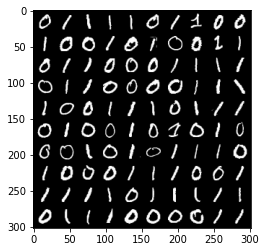

In [20]:
import torchvision.utils as u
import matplotlib.pyplot as plt
import numpy as np

# Plot the first 100 examples of the dataset.
plt.imshow(np.transpose(u.make_grid(list(X_[:100]), 10).numpy(), (1,2,0)))
plt.show()

In [21]:
# Each image has a size of 28x28.
n = 28*28

# Convert lists of examples and labels to tensors.
X = torch.stack(X_).view((-1, n))
y = torch.tensor(y_).view(-1, 1).float()


In [22]:
#training
from tqdm import tqdm_notebook

# take Linear regression model as example 
# linear equation have total (28*28 + 1) params
model = torch.nn.Linear(n, 1, bias=True)

# Select a loss function.
loss = torch.nn.BCELoss()

# Use stochastic gradient descent as the optimizer.
opt = torch.optim.SGD(model.parameters(), lr=0.01)

costs = []
for i in tqdm_notebook(range(1000)):
    # Classify the training examples.
    pred_y = torch.sigmoid(model(X))
    # Compute the loss function.
    l = loss(pred_y, y)
    costs.append(l)
    # Compute gradient and update the parameters.
    opt.zero_grad()
    l.backward()
    opt.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


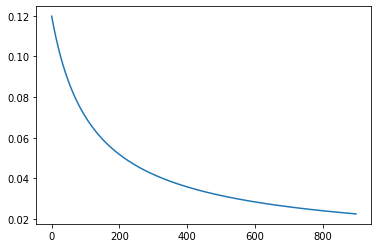

In [23]:
# Plot learning curve, i.e. the error in each iteration.
plt.plot(costs[100:])


In [24]:
# Load test examples for testing
test_set = ds.MNIST(".data", train=False, transform=transforms.ToTensor(), download=True)

X_test_, y_test_ = zip(*[i for i in test_set if i[1] < 2])
X_test = torch.stack(X_test_).view(-1, n)
y_test = torch.tensor(y_test_).view(-1, 1).float()


In [25]:
# Use the classifier to predict the categories for the test examples.
pred_y = torch.sigmoid(model(X_test))
# Convert the probabilities (i.e. [0,1] into class labels {0, 1})
labels = torch.round(pred_y)

In [26]:
# Compute the accuracy of the classifier for the test examples.
torch.sum(labels == y_test).item() / y_test.size(0)

0.9990543735224586

In [27]:
# We have 28*28+1 unknowns (28*28 weights + 1 bias). Therefore, 
# we need 28*28+1 queries (i.e. equations).
k = n+1

# Create k random queries.
queries = torch.rand((k, n))

# Use the classifier to predict the categories for the queries.
output = model(queries)

In [28]:
# Add a column with ones for the bias to the queries. Shape (k, n) → (k, n+1).
q = torch.cat((queries, torch.ones((k, 1))), 1)

# Convert the queries with the added column into a numpy array.
# a as input
a = q.data.numpy()
# b as output
# Convert the output of the classifier into a numpy array.
b = output.data.squeeze().numpy()

In [29]:
# Solve for the parameters.
# Solve a linear matrix equation in matrix form
x = np.linalg.solve(a, b)


In [30]:
# Print the first 20 recovered parameter.
x[:20]

array([ 0.00083887,  0.00014891, -0.03328076, -0.00629385, -0.01003509,
        0.02298542, -0.01491178,  0.00369603,  0.02563387,  0.01986812,
        0.01151168, -0.01218908, -0.00396737, -0.01774734, -0.02073263,
        0.02062985, -0.01129775, -0.00569884, -0.00120029, -0.03258685],
      dtype=float32)

In [31]:
# Print the first 20 parameters of the model.
model.weight.squeeze().data.numpy()[:20]

array([ 0.00083876,  0.00014962, -0.0332806 , -0.00629371, -0.01003518,
        0.022985  , -0.0149115 ,  0.00369578,  0.02563317,  0.01986811,
        0.0115114 , -0.01218901, -0.00396702, -0.01774754, -0.020733  ,
        0.02062946, -0.01129781, -0.00569881, -0.00119992, -0.03258692],
      dtype=float32)

In [ ]:
#node:code modified from https://github.com/daniel-e/secml